In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp, seaborn
import matplotlib.pyplot as plt
###############
import torch
from torch import Tensor
from torch import nn
from torch.autograd import Variable
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline
###############
df = pd.read_csv('covid_19.csv',index_col = 0)
df = df.drop(['Lat', 'Long'], axis=1)
df = df.drop('Country/Region')
df = df.loc[df.index.notnull()]#取出不是null的
df = df.T
df

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/8/20,444,400,1572,564,19,19,1715,881,6010,12942,...,61474,424,545,167,251,263,4,0,39,11
4/9/20,484,409,1666,583,19,19,1795,921,6108,13244,...,65872,456,582,171,255,263,4,0,39,11
4/10/20,521,416,1761,601,19,19,1975,937,6215,13555,...,74605,473,624,171,257,267,4,1,40,13
4/11/20,555,433,1825,601,19,21,1975,967,6303,13806,...,79874,494,767,175,258,268,4,1,40,14


In [2]:
df = df.astype('float')
df2 = df.copy()
for i in range(df2.shape[0]-1):
    for j in range(df2.shape[1]):
        df2.iloc[i,j] = df2.iloc[i+1,j]-df2.iloc[i,j]#存的是那一天增加的人數(原本資料是總共的人的累加)
df2 = df2.drop('4/12/20')
df2

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/7/20,21.0,17.0,104.0,19.0,2.0,0.0,87.0,28.0,115.0,303.0,...,5525.0,0.0,25.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0
4/8/20,40.0,9.0,94.0,19.0,0.0,0.0,80.0,40.0,98.0,302.0,...,4398.0,32.0,37.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0
4/9/20,37.0,7.0,95.0,18.0,0.0,0.0,180.0,16.0,107.0,311.0,...,8733.0,17.0,42.0,0.0,2.0,4.0,0.0,1.0,1.0,2.0
4/10/20,34.0,17.0,64.0,0.0,0.0,2.0,0.0,30.0,88.0,251.0,...,5269.0,21.0,143.0,4.0,1.0,1.0,0.0,0.0,0.0,1.0


In [3]:
df2.corr()#計算相關係數

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
Afghanistan,1.000000,0.576543,0.687565,0.621826,0.399233,0.246526,0.479992,0.595829,0.456688,0.469930,...,0.807996,0.214004,0.633237,0.282792,0.358105,0.512137,0.426037,0.215939,0.299311,0.248334
Albania,0.576543,1.000000,0.800205,0.723154,0.584480,0.463324,0.675384,0.749470,0.739845,0.739458,...,0.722241,0.557531,0.542359,0.445214,0.560941,0.744971,0.326953,0.020705,0.418388,0.242543
Algeria,0.687565,0.800205,1.000000,0.626607,0.409259,0.476803,0.775745,0.817832,0.623110,0.600952,...,0.857098,0.491950,0.571003,0.387081,0.473717,0.748990,0.192540,0.195843,0.302966,0.380363
Andorra,0.621826,0.723154,0.626607,1.000000,0.506431,0.236505,0.644857,0.781346,0.794617,0.785611,...,0.656064,0.570289,0.440180,0.549673,0.672151,0.616715,0.322179,0.087040,0.621416,0.443605
Angola,0.399233,0.584480,0.409259,0.506431,1.000000,0.099321,0.277096,0.368090,0.372372,0.350925,...,0.520091,0.230284,0.489404,0.255282,0.170623,0.493869,0.561456,-0.040159,0.034358,0.181338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0.512137,0.744971,0.748990,0.616715,0.493869,0.587319,0.589197,0.694183,0.497694,0.504904,...,0.624269,0.303502,0.477917,0.330774,0.400999,1.000000,0.367763,0.006700,0.282622,0.164468
Western Sahara,0.426037,0.326953,0.192540,0.322179,0.561456,-0.040469,0.086609,0.276255,0.020536,0.030589,...,0.380397,-0.140541,0.426324,0.076709,-0.041432,0.367763,1.000000,-0.016855,0.044117,-0.052997
Yemen,0.215939,0.020705,0.195843,0.087040,-0.040159,-0.030012,0.337516,0.019091,0.025459,0.058141,...,0.461233,0.108966,0.136300,-0.052269,-0.030727,0.006700,-0.016855,1.000000,0.032718,0.415494
Zambia,0.299311,0.418388,0.302966,0.621416,0.034358,0.086528,0.303384,0.484861,0.653173,0.525080,...,0.299138,0.412878,0.108448,0.386539,0.521003,0.282622,0.044117,0.032718,1.000000,0.337821


In [4]:
# df_corr = df2.corr()
# seaborn.heatmap(df_corr, center=0,vmin=-1, annot=True,)
# mp.show()

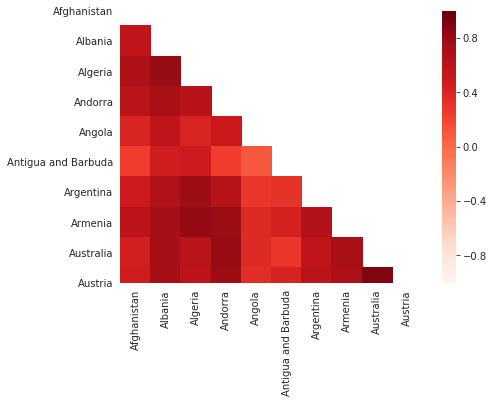

In [5]:
df_pic = df2.iloc[:,:10]#取前10個畫圖
df_corr = df_pic.corr()

#畫出三角形熱力圖
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True
with seaborn.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = seaborn.heatmap(df_corr, mask=mask, vmax=1, vmin=-1,cmap="Reds", square=True)

In [6]:
threshold = 0.8
C = []
for i in range(df2.shape[1]):
    for j in range(df2.shape[1]):
        if(df2.corr().iloc[i,j]>threshold and df2.corr().iloc[i,j]!=1): #將大於門檻的相關係數取出
            C.append(i)
C = list(set(C))#去除重複
C2 = []#存國家X
for i in range(len(C)):
    C2.append(df2.iloc[:,i])
print(len(C2))
C2

103


[1/22/20     0.0
 1/23/20     0.0
 1/24/20     0.0
 1/25/20     0.0
 1/26/20     0.0
            ... 
 4/7/20     21.0
 4/8/20     40.0
 4/9/20     37.0
 4/10/20    34.0
 4/11/20    52.0
 Name: Afghanistan, Length: 81, dtype: float64, 1/22/20     0.0
 1/23/20     0.0
 1/24/20     0.0
 1/25/20     0.0
 1/26/20     0.0
            ... 
 4/7/20     17.0
 4/8/20      9.0
 4/9/20      7.0
 4/10/20    17.0
 4/11/20    13.0
 Name: Albania, Length: 81, dtype: float64, 1/22/20      0.0
 1/23/20      0.0
 1/24/20      0.0
 1/25/20      0.0
 1/26/20      0.0
            ...  
 4/7/20     104.0
 4/8/20      94.0
 4/9/20      95.0
 4/10/20     64.0
 4/11/20     89.0
 Name: Algeria, Length: 81, dtype: float64, 1/22/20     0.0
 1/23/20     0.0
 1/24/20     0.0
 1/25/20     0.0
 1/26/20     0.0
            ... 
 4/7/20     19.0
 4/8/20     19.0
 4/9/20     18.0
 4/10/20     0.0
 4/11/20    37.0
 Name: Andorra, Length: 81, dtype: float64, 1/22/20    0.0
 1/23/20    0.0
 1/24/20    0.0
 1/25/20    0.0
 

In [7]:
print(len(C2))
len(C2[0])

103


81

In [8]:
# np.set_printoptions(threshold=np.inf)#將所有資料印出
# L = 6
# label = np.zeros((73,103))
# # label = np.zeros(74) #col為國家
# # for i in range(74):
# #     if(C2[0][i+L]<C2[0][i+L+1]):
# #         label[i] = 5
# #     else :
# #         label[i] = 2
# label
# for i in range(len(C2[0])-(L+2)):
#     for j in range(len(C2)):
#         if(C2[j][i+L-1]<C2[j][i+L]):
#             label[i,j] = 1
#         else :
#             label[i,j] = 0
# print(len(label))
# print(len(label[0]))
# label = label.T
# print(len(label))
# print(len(label[0]))
# label

In [9]:
print(len(C2))
print(len(C2[0]))

103
81


In [10]:
LL = 5
sub = []#subsequence每LL個取出
l = []#label
for i in range(len(C2)):
    for j in range(len(C2[0])-(LL-1)-1):
        sub.append(list(C2[i][j:j+LL]))#不包含最後一筆沒有label的
    for j in range(len(C2[0])-(LL-1)-1):   
        if(C2[i][j+LL]>C2[i][j+LL-1]):#判斷每L天與L-1相比人數有沒有變多
            l.append(1)
        else:
            l.append(0)

In [11]:
print(len(sub))
sub

7828


[[0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 1.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0

In [12]:
print(len(l))
l

7828


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [13]:
sub[0:76]

[[0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 1.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0

In [14]:
X_train = sub[:int(103*0.7)*76]
Y_train = l[:int(103*0.7)*76]
X_test = sub[int(103*0.7)*76:]
Y_test = l[int(103*0.7)*76:]

In [15]:
print(X_train)

[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], 

In [16]:
print(X_test)

[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], 

In [17]:
print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))

5472
5472
2356
2356


In [18]:
EPOCH = 50              
BATCH_SIZE = 64
#TIME_STEP = 76          
INPUT_SIZE = LL         
LR = 0.0001               

In [19]:
X_test = np.array(X_test)
X_test = np.reshape(X_test,(len(X_test), 1, LL))
print(list(X_test))

[array([[0., 0., 0., 0., 0.]]), array([[0., 0., 0., 0., 0.]]), array([[0., 0., 0., 0., 0.]]), array([[0., 0., 0., 0., 0.]]), array([[0., 0., 0., 0., 0.]]), array([[0., 0., 0., 0., 0.]]), array([[0., 0., 0., 0., 0.]]), array([[0., 0., 0., 0., 0.]]), array([[0., 0., 0., 0., 0.]]), array([[0., 0., 0., 0., 0.]]), array([[0., 0., 0., 0., 0.]]), array([[0., 0., 0., 0., 0.]]), array([[0., 0., 0., 0., 0.]]), array([[0., 0., 0., 0., 0.]]), array([[0., 0., 0., 0., 0.]]), array([[0., 0., 0., 0., 0.]]), array([[0., 0., 0., 0., 0.]]), array([[0., 0., 0., 0., 0.]]), array([[0., 0., 0., 0., 0.]]), array([[0., 0., 0., 0., 0.]]), array([[0., 0., 0., 0., 0.]]), array([[0., 0., 0., 0., 0.]]), array([[0., 0., 0., 0., 0.]]), array([[0., 0., 0., 0., 0.]]), array([[0., 0., 0., 0., 0.]]), array([[0., 0., 0., 0., 0.]]), array([[0., 0., 0., 0., 0.]]), array([[0., 0., 0., 0., 0.]]), array([[0., 0., 0., 0., 0.]]), array([[0., 0., 0., 0., 0.]]), array([[0., 0., 0., 0., 0.]]), array([[0., 0., 0., 0., 0.]]), array([

In [20]:
X_train = torch.Tensor(X_train)
Y_train = torch.Tensor(Y_train)
X_test = torch.Tensor(X_test)
Y_test = torch.Tensor(Y_test).long()

data_train = torch.utils.data.TensorDataset(Tensor(X_train),Tensor(Y_train))
print(data_train)
train_loader = torch.utils.data.DataLoader(dataset=data_train, batch_size=BATCH_SIZE, shuffle=True)

In [21]:
X_train

tensor([[ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        ...,
        [ 0.,  0., 15.,  0.,  3.],
        [ 0., 15.,  0.,  3.,  0.],
        [15.,  0.,  3.,  0.,  2.]])

In [22]:
# train_loader = torch.utils.data.DataLoader(dataset=X_train, batch_size=BATCH_SIZE, shuffle=True)
# train_loader_Y = torch.utils.data.DataLoader(dataset=Y_train, batch_size=BATCH_SIZE, shuffle=True)

In [23]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()

        self.rnn = nn.RNN(         
            input_size=INPUT_SIZE,
            hidden_size=64,         
            num_layers=1,           
            batch_first=True,       
        )

        self.out = nn.Linear(64, 2)

    def forward(self, x):
        # x shape (batch, time_step, input_size)
        # r_out shape (batch, time_step, output_size)
        # h_n shape (n_layers, batch, hidden_size)
        # h_c shape (n_layers, batch, hidden_size)
        r_out, h_n = self.rnn(x, None)   

        # choose r_out at the last time step
        out = self.out(r_out[:, -1, :])#-1表示取最後一個結果
        return out

In [24]:
rnn = RNN()
print(rnn)

RNN(
  (rnn): RNN(5, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=2, bias=True)
)


In [25]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)  
loss_func = nn.CrossEntropyLoss()                       

In [26]:
# for epoch in range(EPOCH):
#     for step, (x, y) in enumerate(train_loader):        # gives batch data
#         b_x = Variable(x.view(-1, 28, 28))              # reshape x to (batch, time_step, input_size)
#         b_y = Variable(y)                               # batch y

#         output = rnn(b_x)                               # rnn output
#         loss = loss_func(output, b_y)                   # cross entropy loss
#         optimizer.zero_grad()                           # clear gradients for this training step
#         loss.backward()                                 # backpropagation, compute gradients
#         optimizer.step()                                # apply gradients

#         if (step % 50 == 0):
#             test_output = rnn(test_x)                   # (samples, time_step, input_size)
#             pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
#             accuracy = sum(pred_y == test_y) / float(test_y.size)
#             print('Epoch: ', epoch, '| train loss: %.4f' % loss.data, '| test accuracy: %.2f' % accuracy)

In [37]:
epo = []
train_acc = []
test_acc = []
for epoch in range(EPOCH):
    for step,(x,y) in enumerate(train_loader):
        #print(x.shape)
        b_x = Variable(x.view(-1, 1, 5))
        b_y = Variable(y)
        b_y = b_y.long()
        output = rnn(b_x)
        loss = loss_func(output, b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (step % 20 == 0):
            test_output = rnn(X_test)                   # (samples, time_step, input_size)
#             print(test_output)
#             print(torch.max(test_output, 1)[1].data.numpy().squeeze())
            pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
            #accuracy = sum(pred_y == Y_test) / float(Y_test.size)
            accuracy = (pred_y == Y_test.data.numpy()).astype(int).sum() / Y_test.size(0)
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data, '| test accuracy: %.2f' % accuracy)
            epo.append(epoch)
            train_acc.append(1-loss.data)
            test_acc.append(accuracy)

Epoch:  0 | train loss: 0.3876 | test accuracy: 0.81
Epoch:  0 | train loss: 0.3307 | test accuracy: 0.81
Epoch:  0 | train loss: 0.3076 | test accuracy: 0.81
Epoch:  0 | train loss: 0.4268 | test accuracy: 0.81
Epoch:  0 | train loss: 0.3969 | test accuracy: 0.81
Epoch:  1 | train loss: 0.3308 | test accuracy: 0.81
Epoch:  1 | train loss: 0.3753 | test accuracy: 0.81
Epoch:  1 | train loss: 0.4687 | test accuracy: 0.81
Epoch:  1 | train loss: 0.2296 | test accuracy: 0.81
Epoch:  1 | train loss: 0.3243 | test accuracy: 0.81
Epoch:  2 | train loss: 0.3248 | test accuracy: 0.81
Epoch:  2 | train loss: 0.2966 | test accuracy: 0.81
Epoch:  2 | train loss: 0.3385 | test accuracy: 0.81
Epoch:  2 | train loss: 0.4641 | test accuracy: 0.81
Epoch:  2 | train loss: 0.2918 | test accuracy: 0.81
Epoch:  3 | train loss: 0.3494 | test accuracy: 0.81
Epoch:  3 | train loss: 0.4411 | test accuracy: 0.81
Epoch:  3 | train loss: 0.4006 | test accuracy: 0.81
Epoch:  3 | train loss: 0.3275 | test accuracy

Epoch:  30 | train loss: 0.3841 | test accuracy: 0.81
Epoch:  30 | train loss: 0.4810 | test accuracy: 0.81
Epoch:  30 | train loss: 0.2840 | test accuracy: 0.81
Epoch:  31 | train loss: 0.4154 | test accuracy: 0.81
Epoch:  31 | train loss: 0.4387 | test accuracy: 0.81
Epoch:  31 | train loss: 0.2811 | test accuracy: 0.81
Epoch:  31 | train loss: 0.2929 | test accuracy: 0.81
Epoch:  31 | train loss: 0.3245 | test accuracy: 0.81
Epoch:  32 | train loss: 0.3788 | test accuracy: 0.81
Epoch:  32 | train loss: 0.3495 | test accuracy: 0.81
Epoch:  32 | train loss: 0.2208 | test accuracy: 0.81
Epoch:  32 | train loss: 0.3240 | test accuracy: 0.81
Epoch:  32 | train loss: 0.3370 | test accuracy: 0.81
Epoch:  33 | train loss: 0.3494 | test accuracy: 0.81
Epoch:  33 | train loss: 0.3214 | test accuracy: 0.81
Epoch:  33 | train loss: 0.3392 | test accuracy: 0.81
Epoch:  33 | train loss: 0.3754 | test accuracy: 0.81
Epoch:  33 | train loss: 0.3286 | test accuracy: 0.81
Epoch:  34 | train loss: 0.4

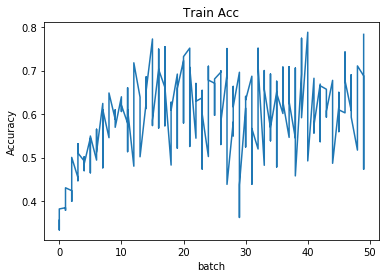

In [28]:
plt.plot(epo,train_acc)
plt.title("Train Acc")
plt.xlabel("batch")
plt.ylabel("Accuracy")
plt.show()

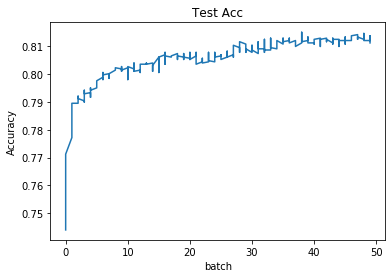

In [29]:
plt.plot(epo,test_acc)
plt.title("Test Acc")
plt.xlabel("batch")
plt.ylabel("Accuracy")
plt.show()

In [30]:
Final = df2.tail(5).T #最後要預測出來的結果
Final= Final.values.tolist()
Final = torch.Tensor(Final)
Final = np.reshape(Final,(len(Final), 1, LL))#轉維度
final_out = rnn(Final)
pred_final = torch.max(final_out, 1)[1].data.numpy().squeeze()
print(pred_final)

[0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1
 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1
 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0
 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]


In [31]:
ascending = []#預測會上升的國家
descending = []#預測會下降的國家
country = []
for c in df2.columns:
    country.append(c)
for i in range(len(country)):
    if(pred_final[i]==1): 
        ascending.append(country[i])
    if(pred_final[i]==0): 
        descending.append(country[i])

In [32]:
from pygal.maps.world import World
from pygal_maps_world.maps import World
from pygal.maps.world import COUNTRIES

wm = World()


In [33]:
COUNTRIES.items()

dict_items([('ad', 'Andorra'), ('ae', 'United Arab Emirates'), ('af', 'Afghanistan'), ('al', 'Albania'), ('am', 'Armenia'), ('ao', 'Angola'), ('aq', 'Antarctica'), ('ar', 'Argentina'), ('at', 'Austria'), ('au', 'Australia'), ('az', 'Azerbaijan'), ('ba', 'Bosnia and Herzegovina'), ('bd', 'Bangladesh'), ('be', 'Belgium'), ('bf', 'Burkina Faso'), ('bg', 'Bulgaria'), ('bh', 'Bahrain'), ('bi', 'Burundi'), ('bj', 'Benin'), ('bn', 'Brunei Darussalam'), ('bo', 'Bolivia, Plurinational State of'), ('br', 'Brazil'), ('bt', 'Bhutan'), ('bw', 'Botswana'), ('by', 'Belarus'), ('bz', 'Belize'), ('ca', 'Canada'), ('cd', 'Congo, the Democratic Republic of the'), ('cf', 'Central African Republic'), ('cg', 'Congo'), ('ch', 'Switzerland'), ('ci', "Cote d'Ivoire"), ('cl', 'Chile'), ('cm', 'Cameroon'), ('cn', 'China'), ('co', 'Colombia'), ('cr', 'Costa Rica'), ('cu', 'Cuba'), ('cv', 'Cape Verde'), ('cy', 'Cyprus'), ('cz', 'Czech Republic'), ('de', 'Germany'), ('dj', 'Djibouti'), ('dk', 'Denmark'), ('do', 'Do

In [34]:
from pygal.maps.world import COUNTRIES

def get_country_code(country_name):
    for code, name in COUNTRIES.items():
        if name == country_name:
            return code
        elif country_name == 'Burma':
            return 'mm'
        elif country_name == 'Congo (Brazzaville)':
            return 'cd'
        elif country_name == 'Congo (Kinshasa)':
            return 'cg'
        elif country_name == 'Iran':
            return 'ir'
        elif country_name == 'Moldova':
            return 'md'
        elif country_name == 'Syria':
            return 'sy'
        elif country_name == 'US':
            return 'us'
        elif country_name == 'Bolivia':
            return 'bo'
        elif country_name == 'Brunei':
            return 'bn'
        elif country_name == 'Cabo Verde':
            return 'cv'
        elif country_name == 'Czechia':
            return 'cz'
        elif country_name == 'Dominica':
            return 'do'
        elif country_name == 'Holy See':
            return 'va'
        elif country_name == 'Korea, South':
            return 'kr'
        elif country_name == 'Laos':
            return 'la'
        elif country_name == 'Libya':
            return 'ly'
        elif country_name == 'North Macedonia':
            return 'mk'
        elif country_name == 'Russia':
            return 'ru'
        elif country_name == 'Taiwan*':
            return 'tw'
        elif country_name == 'Venezuela':
            return 've'
        elif country_name == 'Vietnam':
            return 'vn'
        
    return None

In [35]:
ascend = []#預測會上升國家的代號
descend = []#預測會下降國家的代號
for i in range(len(ascending)):
    country_code = get_country_code(ascending[i])
    if(country_code!=None):
        ascend.append(country_code)

for i in range(len(descending)):
    country_code = get_country_code(descending[i])
    if(country_code!=None):
        descend.append(country_code)


OSError: no library called "cairo" was found
no library called "libcairo-2" was found
cannot load library 'libcairo.so': error 0x7e
cannot load library 'libcairo.2.dylib': error 0x7e
cannot load library 'libcairo-2.dll': error 0x7e

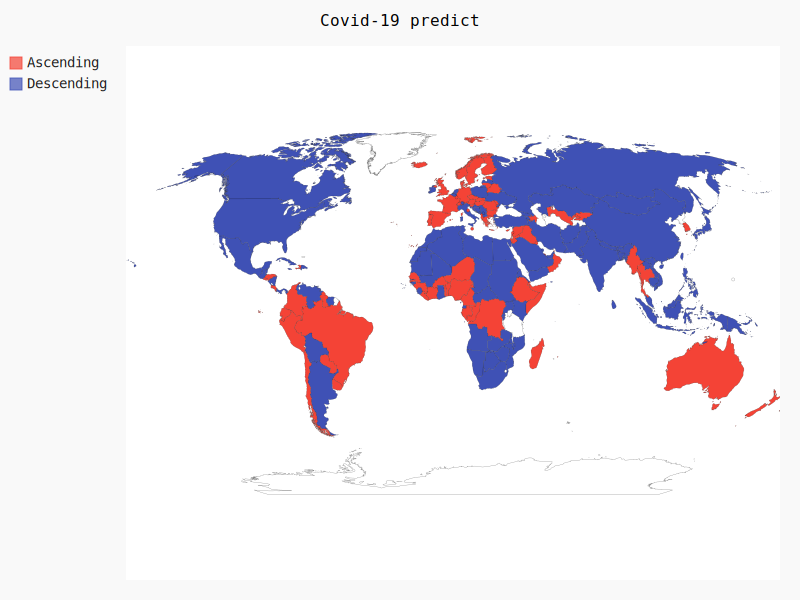

In [36]:
worldmap_chart = World()
worldmap_chart.title = 'Covid-19 predict'
worldmap_chart.add('Ascending', ascend)
worldmap_chart.add('Descending', descend)